# 목표
MSE Loss값 3000이하로 떨어뜨리기

In [49]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np


data = datasets.load_diabetes()
print(data["feature_names"])
x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [54]:
def MSE(a, b):
    return ((a - b)**2).mean()


def loss(X, y, W, b):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


def model(x, w, b):
    return x @ w.T + b


def gradient(x, y, w, b):
    N = len(y)
    
    # y_pred 준비
    y_pred = model(x, w, b)
    
    # 공식에 맞게 gradient 계산
    dw = 1/N * 2 * x.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()

    return dw, db


def train(x, y, epoch=1000000, learning_rate=0.003):
    losses = []

    W = np.random.rand(x.shape[1])
    b = np.random.rand()    
    
    for i in range(epoch):
         dw, db = gradient(x, y, W, b)
         W -= learning_rate * dw
         b -= learning_rate * db
         L = loss(x, y, W, b)
         losses.append(L)
         
         if i % 100000 == 0:
            print(f'Iteration[{i}]: Loss {L}')

    return losses, W, b

losses, w, b = train(X_train, y_train)

Iteration[0]: Loss 29273.619571267587
Iteration[100000]: Loss 2979.0827349611773
Iteration[200000]: Loss 2906.16829894976
Iteration[300000]: Loss 2898.7508456042774
Iteration[400000]: Loss 2897.0887100973255
Iteration[500000]: Loss 2896.2140622590146
Iteration[600000]: Loss 2895.4920238403843
Iteration[700000]: Loss 2894.814275780093
Iteration[800000]: Loss 2894.1592685185287
Iteration[900000]: Loss 2893.522120216347


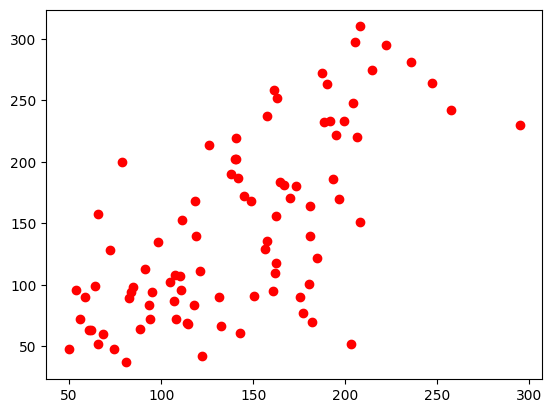

In [61]:
import matplotlib.pyplot as plt

y_pred = model(X_test, w, b)

plt.scatter(y_pred, y_test, c="r")
plt.show()

# 결과
MSE를 낮추는데 epoch를 많이 돌리는 것 보다 learning rate를 적절히 올려주는 것이 좋음